# Author: Ameni Daalouch 


task 1: prediction using supervised Machine Learning.

GRIP @The sparks Foundations 

<small> In this task I will predict the percentage of a student based on the number of study hours. </small>

Technical stack : Pandas, NumPy, Matplotlib, scikit learn

In [389]:
#importing all the libraries required
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

step 1: importing the data 

In [390]:
#reading the data from remote link 
url = r'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
data = pd.read_csv(url)
print('data imported succefully')
data.head()

data imported succefully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


<small> check for missing or duplicated values
 </small>

In [391]:
#check for missing values 
df = pd.DataFrame(data)
print(df.isnull().sum())

Hours     0
Scores    0
dtype: int64


In [392]:
#check for duplicated values 
print(df.duplicated().sum())

0


<small> description of data </small>

In [393]:
print(data.describe())

           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000


step 2: Data Vizualisation 

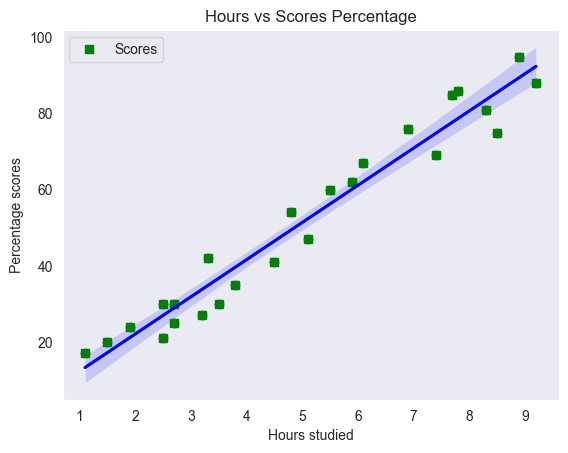

In [394]:
#plottind data
sns.set_style('dark')
data.plot( x='Hours', y='Scores',style='s', color='green')
sns.regplot( x= data['Hours'], y=data['Scores'], color='blue' ) 
plt.title('Hours vs Scores Percentage')
plt.xlabel('Hours studied')
plt.ylabel('Percentage scores')
plt.show()


From the scatter plot above, we can conclude a positive linear relation between 'Hours studied' and 'Percentage scores'. So, we plot a regression line to confirm the correlation.

In [395]:
#the correlation between 'Hours studied' and 'Percentage scores'
print(data.corr())

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


 now we can conclude that there is a strong positive correlation between the two variables 

Step 3: Preparing the data

<small> dividing data into attributes (inputs) and labels (outputs) </small>

In [396]:
x = data.iloc[:, :-1].values
y = data.iloc[:, 1].values


<small> splitting the data into training and test sets.

In [397]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

Step 4: Model training 

In [398]:
regressor = LinearRegression() 
regressor.fit(x_train, y_train)
print('training complete.')

training complete.


Step 5: Making predictions

<small> we will test the model to make predictions. </small>

In [399]:
print(x_test)
#predicting the scores
y_pred = regressor.predict(x_test)

[[6.9]
 [8.5]
 [5.5]
 [1.5]
 [1.1]]


<small> comparing actual vs predicted scores </small>

In [400]:
df = pd.DataFrame({'Actuals' : y_test ,'Predicted' : y_pred,})
df

,Actuals,Predicted
0,76,70.452579
1,75,86.808450
2,60,56.141192
3,20,15.251514
4,17,11.162546


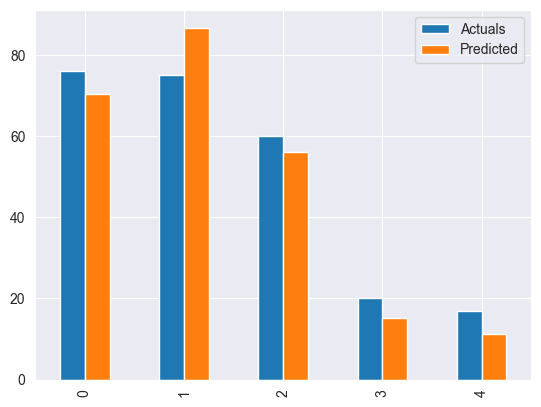

In [401]:
# comparing actuals vd predicted using vizualisation
df.plot(kind='bar')
plt.grid(which='major')
plt.show()

predicting the score when the number of hours is 9.25

In [402]:
hours = 9.25
input_data = np.array(hours).reshape(1, -1)
own_pred = regressor.predict(input_data)
print('number of hours = ', hours)
print('predicted score = ', own_pred)

number of hours =  9.25
predicted score =  [94.47526487]


Step 6: Evaluate the model

In [404]:
# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Calculate root mean squared error
rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

Mean Squared Error: 48.3455513674122
Root Mean Squared Error: 6.953096530856752
R-squared: 0.9286770456635605


<small> the R-squared value of 0.93 indicates that the model is able to explain a large proportion (around 93%) of the variance in the target variable. </small>